In [10]:
from sklearn.model_selection import train_test_split

#2. RandomForest 모델 생성
from sklearn import svm, metrics, model_selection
from sklearn.ensemble import RandomForestClassifier
import random, re
from sklearn.metrics import accuracy_score
import numpy
import pandas as pd
import tensorflow as tf

# 모델의 성능을 평가하기 위한 패키지 불러들임
from sklearn.metrics import classification_report, confusion_matrix


# seed 값 설정
seed = 0
numpy.random.seed(seed)
tf.set_random_seed(seed)

filename="./dataset/20201103_v1.csv"
# 데이터 읽어 들이기--- (※1)
#df_pre = pd.read_csv("./dataset/data2018_2_notitle.csv", header=None)
df_pre = pd.read_csv(filename, header=0)
features = len(df_pre.columns)-1
#features =14
#filename="./dataset/20200614_v1.csv"
#filename="./dataset/20200717_v1.csv"



#df_pre=pd.read_csv('./dataset/sjcu_stddata_v11_notitle.csv',encoding="cp949", header=None) # CSV파일을 불러오는 함수를 이용
df_pre.tail()

# 데이터 내부의 기호를 숫자로 변환하기--- (※2)
df = df_pre.sample(frac=1)
dataset = df.values
X = dataset[:,0:features]
Y = dataset[:,features]


# 학습 전용과 테스트 전용 데이터로 나누기 --- (※3)
#테스트, 검증데이터 분학 7:3 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=seed)
X_train, X_test = X_train / 255., X_test / 255.



In [14]:
# 데이터 학습시키기 --- (※4)
rf_model = RandomForestClassifier()
rf_model.fit(X_train, Y_train)

# 데이터 예측하기 --- (※5)
predict = rf_model.predict(X_test)

In [15]:
# 결과 테스트하기 --- (※6)
accuracy  = metrics.accuracy_score(Y_test, predict)
f_measure = metrics.classification_report(Y_test, predict)

print('Accuracy of RandomForest Model: %.2f' % accuracy)
print("\r\n",  f_measure)


Accuracy of RandomForest Model: 0.91

               precision    recall  f1-score   support

           0       0.92      0.98      0.95     24830
           1       0.82      0.57      0.67      4776

    accuracy                           0.91     29606
   macro avg       0.87      0.77      0.81     29606
weighted avg       0.91      0.91      0.90     29606



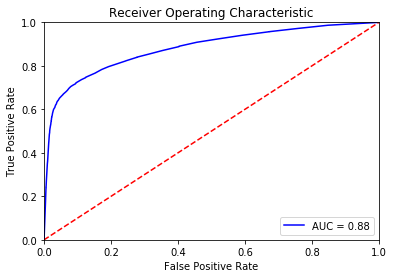

In [16]:
# calculate the fpr and tpr for all thresholds of the classification
probs = rf_model.predict_proba(X_test)
preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()